In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
airfoil_self_noise = fetch_ucirepo(id=291) 
  
# data (as pandas dataframes) 
X = airfoil_self_noise.data.features 
y = airfoil_self_noise.data.targets 
  
# metadata 
print(airfoil_self_noise.metadata) 
  
# variable information 
print(airfoil_self_noise.variables) 

{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [5]:
X

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   attack-angle                         1503 non-null   float64
 2   chord-length                         1503 non-null   float64
 3   free-stream-velocity                 1503 non-null   float64
 4   suction-side-displacement-thickness  1503 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [7]:
X.describe()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140
std,3152.573137,5.918128,0.093541,15.572784,0.013150
min,200.000000,0.000000,0.025400,31.700000,0.000401
25%,800.000000,2.000000,0.050800,39.600000,0.002535
50%,1600.000000,5.400000,0.101600,39.600000,0.004957
75%,4000.000000,9.900000,0.228600,71.300000,0.015576
max,20000.000000,22.200000,0.304800,71.300000,0.058411


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

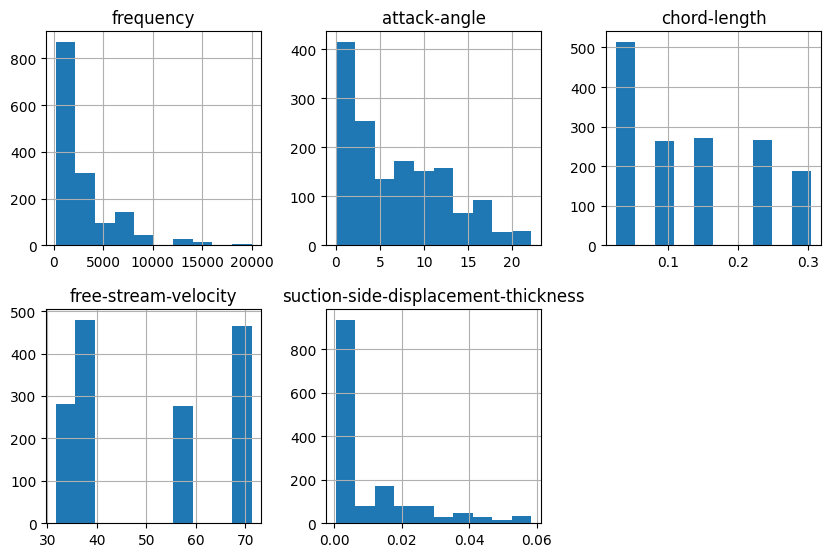

In [38]:
#plt.subplots_adjust(hspace=.5,wspace=.5)
X.hist(sharex=False,sharey=False,layout=(3,3),figsize=(10,10));

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


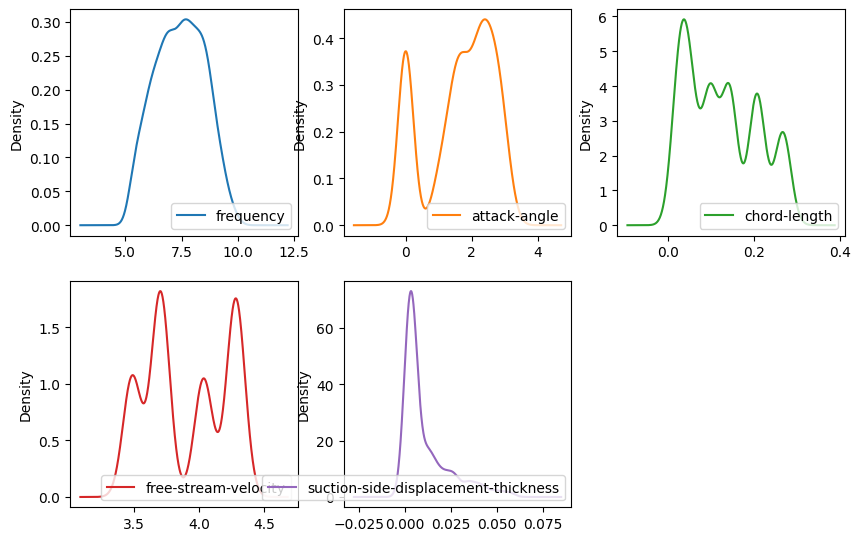

In [88]:
np.log1p(X).plot(kind='density',layout=(3,3),subplots=True,sharex=False,sharey=False,figsize=(10,10))
# Get all axes objects
axes = plt.gcf().axes;
# Iterate over each axis and add legend manually
for ax in axes:
    ax.legend(loc='lower right');

In [60]:
pd.concat([X,y],axis=1).corr().style.background_gradient()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
attack-angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord-length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free-stream-velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
suction-side-displacement-thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
scaled-sound-pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


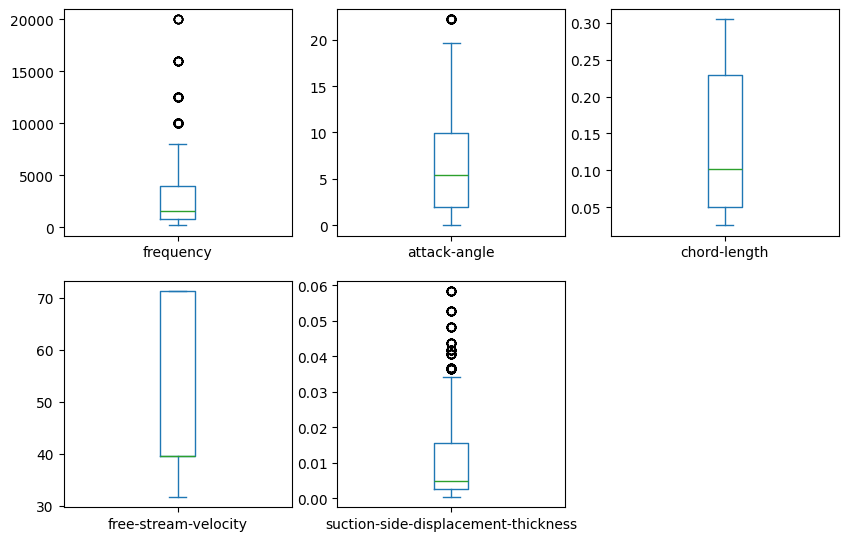

In [71]:
X.plot(kind='box',layout=(3,3),subplots=True,figsize=(10,10));

In [86]:
(np.log(X)).skew()

frequency                             -0.031788
attack-angle                                NaN
chord-length                          -0.398862
free-stream-velocity                   0.039197
suction-side-displacement-thickness   -0.007618
dtype: float64

In [85]:
np.power(X,2).skew()

frequency                              4.964697
attack-angle                           1.819618
chord-length                           1.096854
free-stream-velocity                   0.396863
suction-side-displacement-thickness    2.961385
dtype: float64

In [94]:
Xs = np.log(X[X.drop('attack-angle',axis=1).columns])+10
Xs.describe()

,frequency,chord-length,free-stream-velocity,suction-side-displacement-thickness
count,1503.000000,1503.000000,1503.000000,1503.000000
mean,17.425554,7.701620,13.881376,4.831177
std,1.084833,0.853562,0.310300,1.211918
min,15.298317,6.326994,13.456317,2.177658
25%,16.684612,7.020141,13.678829,4.022482
50%,17.377759,7.713288,13.678829,4.693128
75%,18.294050,8.524218,14.266896,5.837394
max,19.903488,8.811901,14.266896,7.159754


In [95]:
Xs['attack-angle'] = np.log1p(X['attack-angle'])

In [97]:
Xs=Xs[X.columns]
Xs.skew()

frequency                             -0.031788
attack-angle                          -0.539446
chord-length                          -0.398862
free-stream-velocity                   0.039197
suction-side-displacement-thickness   -0.007618
dtype: float64

<Axes: >

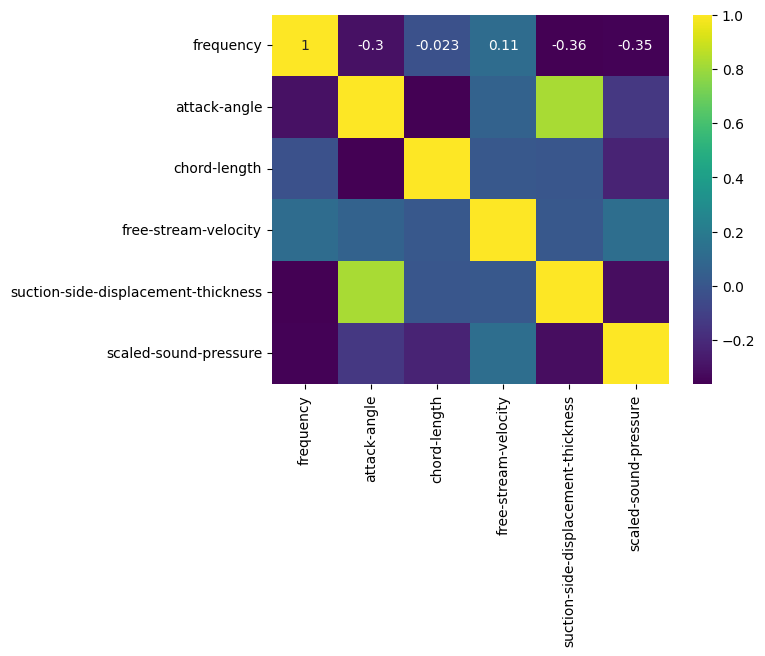

In [99]:
sns.heatmap(pd.concat([Xs,y],axis=1).corr(),annot=True,cmap='viridis')

In [101]:
pd.concat([Xs,y],axis=1).corr().style.background_gradient()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
frequency,1.000000,-0.302054,-0.022501,0.111362,-0.362831,-0.354669
attack-angle,-0.302054,1.000000,-0.357790,0.059827,0.821816,-0.141070
chord-length,-0.022501,-0.357790,1.000000,0.009415,0.003005,-0.234616
free-stream-velocity,0.111362,0.059827,0.009415,1.000000,0.006391,0.123333
suction-side-displacement-thickness,-0.362831,0.821816,0.003005,0.006391,1.000000,-0.318643
scaled-sound-pressure,-0.354669,-0.141070,-0.234616,0.123333,-0.318643,1.000000


In [103]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
folds = 10
val_size=.2
seed = 7
xtrain,xval,ytrain,yval = train_test_split(Xs,y,test_size=val_size,random_state=seed)

In [105]:
scoring = 'neg_mean_squared_error'
#Spot Check Algorithm
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#Spot-Check Algorithms
models=[]
models.append(('lr',LinearRegression()))
models.append(('ls',Lasso()))
models.append(('en',ElasticNet()))
models.append(('knn',KNeighborsRegressor()))
models.append(('crt',DecisionTreeRegressor()))
models.append(('svr',SVR()))

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

#evaluate each model
results=[]
names=[]
for name,model in models:
    kfold = KFold(n_splits=folds,shuffle=True,random_state=seed)
    cv_results=cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)"%(name,cv_results.mean(),cv_results.std()))

lr: -25.29 (3.75)
ls: -31.23 (2.70)
en: -32.71 (2.81)
knn: -4.49 (0.90)
crt: -7.37 (1.48)
svr: -29.28 (2.95)


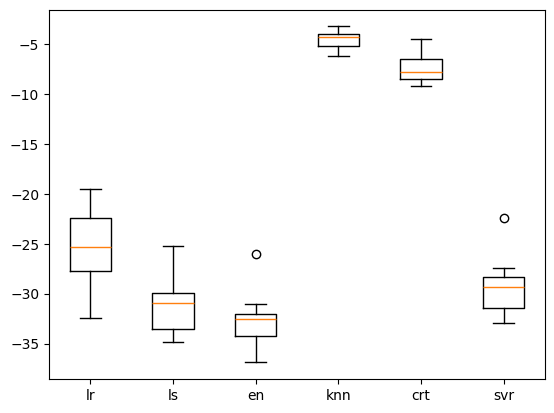

In [107]:
plt.boxplot(results,labels=names);

In [108]:
from sklearn.pipeline import Pipeline

#Standardize the dataset
pipelines=[]
pipelines.append(('scaledlr',Pipeline([('scaler',StandardScaler()),('lr',LinearRegression())])))
pipelines.append(('scaledls',Pipeline([('scaler',StandardScaler()),('ls',Lasso())])))
pipelines.append(('scaleden',Pipeline([('scaler',StandardScaler()),('en',ElasticNet())])))
pipelines.append(('scaledknn',Pipeline([('scaler',StandardScaler()),('knn',KNeighborsRegressor())])))
pipelines.append(('scaledcrt',Pipeline([('scaler',StandardScaler()),('crt',DecisionTreeRegressor())])))
pipelines.append(('scaledsvr',Pipeline([('scaler',StandardScaler()),('svr',SVR())])))
#evaluate each model
results=[]
names=[]
for name,model in pipelines:
    kfold = KFold(n_splits=folds,shuffle=True,random_state=seed)
    cv_results=cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)"%(name,cv_results.mean(),cv_results.std()))

scaledlr: -25.29 (3.75)
scaledls: -31.01 (2.80)
scaleden: -32.61 (2.98)
scaledknn: -6.97 (1.17)
scaledcrt: -7.67 (1.83)
scaledsvr: -7.95 (1.36)


In [109]:
#KNN Algorithm Tuning
scaler=StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)
k = list(range(1,21,1))
param_grid = dict(n_neighbors=k)
model = KNeighborsRegressor()
kfold = KFold(n_splits=folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(xtrain,ytrain)
print("Best: %.2f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: -3.80 using {'n_neighbors': 2}


In [110]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor

ensemble=[]
ensemble.append(('scaledab',Pipeline([('scaler',StandardScaler()),('ab',AdaBoostRegressor())])))
ensemble.append(('scaledgb',Pipeline([('scaler',StandardScaler()),('gb',GradientBoostingRegressor())])))
ensemble.append(('scaledet',Pipeline([('scaler',StandardScaler()),('et',ExtraTreesRegressor())])))
ensemble.append(('scaledrf',Pipeline([('scaler',StandardScaler()),('rf',RandomForestRegressor())])))
#evaluate each model
results=[]
names=[]
for name,model in ensemble:
    kfold = KFold(n_splits=folds,shuffle=True,random_state=seed)
    cv_results=cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)"%(name,cv_results.mean(),cv_results.std()))

scaledab: -15.64 (2.25)
scaledgb: -6.53 (1.28)
scaledet: -2.49 (0.84)
scaledrf: -3.39 (1.16)


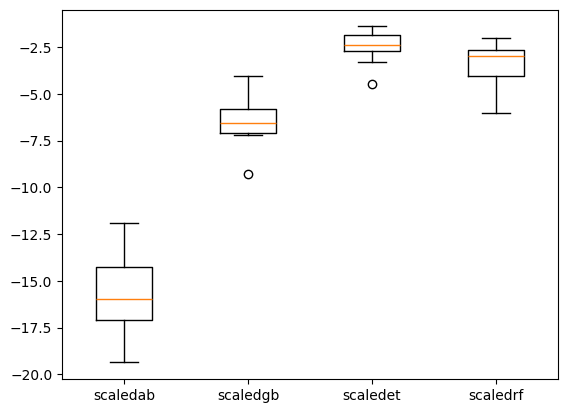

In [112]:
plt.boxplot(results,labels=names);

In [113]:
#ET Algorithm Tuning
scaler=StandardScaler().fit(xtrain)
rescaledx = scaler.transform(xtrain)
k = list(range(50,500,50))
param_grid = dict(n_estimators=k)
model = ExtraTreesRegressor()
kfold = KFold(n_splits=folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledx,ytrain)
print("Best: %.2f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: -2.38 using {'n_estimators': 300}


In [114]:
from sklearn.metrics import mean_squared_error

scaler=StandardScaler().fit(xtrain)
rescaledx=scaler.transform(xtrain)
model=RandomForestRegressor(n_estimators=300,random_state=seed)
model.fit(rescaledx,ytrain)
rescaledvalx=scaler.transform(xval)
pred=model.predict(rescaledvalx)
print(-1*mean_squared_error(yval,pred))

-3.5678294302787106
